In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=7240b695d5b2fdcbf6bfda599500df14de90c19f36ee5d00ca00577d3c5ba01e
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import pyspark
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark import SparkFiles
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession \
       .builder \
       .appName("Week8_Assignment") \
       .getOrCreate()

spark

In [ ]:
spark=SparkSession.builder.getOrCreate()

## 1. Read the Data

In [ ]:
EmpDF = spark.read.csv(SparkFiles.get("/content/download.csv"),inferSchema=True, header= True)
EmpDF.show()

+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+---

### 1.1 Display the number of rows and columns in the dataset

In [ ]:
print("Number of Rows: ", EmpDF.count())
print("Number of Columns", len(EmpDF.columns))

Number of Rows:  62439
Number of Columns 22


### 1.2 Check the datatype of the variables

In [ ]:
EmpDF.cache()
EmpDF.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [ ]:
from pyspark.sql.types import StringType,IntegerType
EmpDF = EmpDF.withColumn("Job Family Code",EmpDF["Job Family Code"].cast(IntegerType()))
EmpDF = EmpDF.withColumn("Job Code",EmpDF["Job Code"].cast(IntegerType()))
EmpDF = EmpDF.withColumn("Employee Identifier",EmpDF["Employee Identifier"].cast(StringType()))

In [ ]:
#EmpDF = EmpDF.drop('Organization Group')
EmpDF = EmpDF.drop('Department')
EmpDF = EmpDF.drop('Union')
EmpDF = EmpDF.drop('Job Family')
#EmpDF = EmpDF.drop('Job')

In [ ]:
EmpDF.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year Type,62439,None,None,Calendar,Fiscal
Year,62439,2014.3277759092875,1.0361490374640712,2013,2016
Organization Group Code,62439,2.9815980396867343,1.574840302813317,1,7
Organization Group,62439,None,None,Community Health,"Public Works, Transportation & Commerce"
Department Code,62439,None,None,AAM,WTR
Union Code,62427,488.6545405033079,333.95157479465297,1,990
Job Family Code,55114,4772.560510940959,3083.592615041862,900,9900
Job Code,53044,4907.3688635849485,3122.1443757431666,109,9989
Job,62438,None,None,Account Clerk,Youth Comm Advisor


### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
EmpDF_shw = EmpDF.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in EmpDF.columns])
EmpDF_shw.show()

+---------+----+-----------------------+------------------+---------------+----------+---------------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group|Department Code|Union Code|Job Family Code|Job Code|Job|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+------------------+---------------+----------+---------------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|                 0|              0|        12|           7325|    9395|  1|                  1|       1|       1|             1|           1|         1|            1|             1|           

### 4. Perform Missing Value Analysis

In [ ]:
EmpDF.groupBy('Job Family Code').count().show()

+---------------+-----+
|Job Family Code|count|
+---------------+-----+
|           5300|  881|
|           9900| 3278|
|           5100|   69|
|           1700|  257|
|           2200|  505|
|           1500|    8|
|           6300|  295|
|           9700|  442|
|           4200|  308|
|           3500|  114|
|           6100|  213|
|           3200| 1777|
|           5500|  122|
|           7400|  520|
|           1300|  255|
|           8200| 1770|
|           null| 7325|
|           1400| 2841|
|           2600|  450|
|           7500|  818|
+---------------+-----+
only showing top 20 rows



In [ ]:
EmpDF.groupBy('Union Code').count().show()

+----------+-----+
|Union Code|count|
+----------+-----+
|       858|  198|
|       251|  153|
|       580|   60|
|       799|   76|
|        34|   23|
|       253| 3924|
|       236|  162|
|        12|    9|
|        22|  690|
|       330|   71|
|       604|    2|
|       556|   14|
|      null|   12|
|         1| 1455|
|       792|  471|
|        16|   87|
|         6| 1390|
|         3|   95|
|       164|  417|
|        40|   13|
+----------+-----+
only showing top 20 rows



In [ ]:
EmpDF.groupBy('Job Code').count().show()

+--------+-----+
|Job Code|count|
+--------+-----+
|    7340|   14|
|    7253|    7|
|    9376|    3|
|    7240|    2|
|    1460|   17|
|    9182|   23|
|    1721|    1|
|    3213|   15|
|    1322|   28|
|    1650|    6|
|    2996|   13|
|    6266|    2|
|    7281|   13|
|    7120|   28|
|    8109|    6|
|    2488|   15|
|    7333|   12|
|    9206|   18|
|    9775|   39|
|    2924|   13|
+--------+-----+
only showing top 20 rows



In [ ]:
distinctDF = EmpDF.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)

Distinct count: 62439
+---------+----+-----------------------+----------------------------------------+---------------+----------+---------------+--------+------------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group                      |Department Code|Union Code|Job Family Code|Job Code|Job                           |Employee Identifier|Salaries |Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+----------------------------------------+---------------+----------+---------------+--------+------------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Fiscal   |2014|2                      |Public Works, Transp

In [ ]:
EmpDF3 = EmpDF.dropDuplicates()
print("Distinct count: "+str(EmpDF3.count()))
EmpDF3.show(truncate=False)

Distinct count: 62439
+---------+----+-----------------------+----------------------------------------+---------------+----------+---------------+--------+------------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group                      |Department Code|Union Code|Job Family Code|Job Code|Job                           |Employee Identifier|Salaries |Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+----------------------------------------+---------------+----------+---------------+--------+------------------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Fiscal   |2014|2                      |Public Works, Transp

In [ ]:
from pyspark.sql import functions as F

EmpDF = EmpDF.withColumn(
    "Union Code",
    F.when(EmpDF["Union Code"] < 0, 0).when(F.col("Union Code").isNull(), 253).otherwise(F.col("Union Code")),
)
EmpDF = EmpDF.withColumn(
    "Job Family Code",
    F.when(EmpDF["Job Family Code"] < 0, 0).when(F.col("Job Family Code").isNull(), 9900).otherwise(F.col("Job Family Code")),
)
EmpDF= EmpDF.withColumn(
    "Job Code",
    F.when(EmpDF["Job Code"] < 0, 0).when(F.col("Job Code").isNull(), 9775).otherwise(F.col("Job Code")),
)
EmpDF = EmpDF.withColumn(
    "Salaries",
    F.when(EmpDF["Salaries"] < 0, 0).when(F.col("Salaries").isNull(), 0).otherwise(F.col("Salaries")),
)
EmpDF = EmpDF.withColumn(
    "Overtime",
    F.when(EmpDF["Overtime"] < 0, 0).when(F.col("Overtime").isNull(), 0).otherwise(F.col("Overtime")),
)
EmpDF = EmpDF.withColumn(
    "Other Salaries",
    F.when(EmpDF["Other Salaries"] < 0, 0).when(F.col("Other Salaries").isNull(), 0).otherwise(F.col("Other Salaries")),
)
EmpDF = EmpDF.withColumn(
    "Total Salary",
    F.when(EmpDF["Total Salary"] < 0, 0).when(F.col("Total Salary").isNull(), 0).otherwise(F.col("Total Salary")),
)
EmpDF = EmpDF.withColumn(
    "Retirement",
    F.when(EmpDF["Retirement"] < 0, 0).when(F.col("Retirement").isNull(), 0).otherwise(F.col("Retirement")),
)
EmpDF= EmpDF.withColumn(
    "Health/Dental",
    F.when(EmpDF["Health/Dental"] < 0, 0).when(F.col("Health/Dental").isNull(), 0).otherwise(F.col("Health/Dental")),
)
EmpDF = EmpDF.withColumn(
    "Other Benefits",
    F.when(EmpDF["Other Benefits"] < 0, 0).when(F.col("Other Benefits").isNull(), 0).otherwise(F.col("Other Benefits")),
)
EmpDF = EmpDF.withColumn(
    "Total Benefits",
    F.when(EmpDF["Total Benefits"] < 0, 0).when(F.col("Total Benefits").isNull(), 0).otherwise(F.col("Total Benefits")),
)
EmpDF = EmpDF.withColumn(
    "Total Compensation",
    F.when(EmpDF["Total Compensation"] < 0, 0).when(F.col("Total Compensation").isNull(), 0).otherwise(F.col("Total Compensation")),
)


In [ ]:
EmpDF.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year Type,62439,None,None,Calendar,Fiscal
Year,62439,2014.3277759092875,1.0361490374640712,2013,2016
Organization Group Code,62439,2.9815980396867343,1.574840302813317,1,7
Organization Group,62439,None,None,Community Health,"Public Works, Transportation & Commerce"
Department Code,62439,None,None,AAM,WTR
Union Code,62439,488.60925062861355,333.9354599143467,1,990
Job Family Code,62439,5374.0835055013695,3333.9948993167927,900,9900
Job Code,62439,5639.7860151507875,3363.0036475199013,109,9989
Job,62438,None,None,Account Clerk,Youth Comm Advisor


In [ ]:
from pyspark.sql.functions import col,isnan,when,count
EmpDF_shw = EmpDF.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in EmpDF.columns])
EmpDF_shw.show()

+---------+----+-----------------------+------------------+---------------+----------+---------------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|Organization Group|Department Code|Union Code|Job Family Code|Job Code|Job|Employee Identifier|Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+------------------+---------------+----------+---------------+--------+---+-------------------+--------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|        0|   0|                      0|                 0|              0|         0|              0|       0|  1|                  1|       0|       0|             0|           0|         0|            0|             0|           

### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

<BarContainer object of 7 artists>

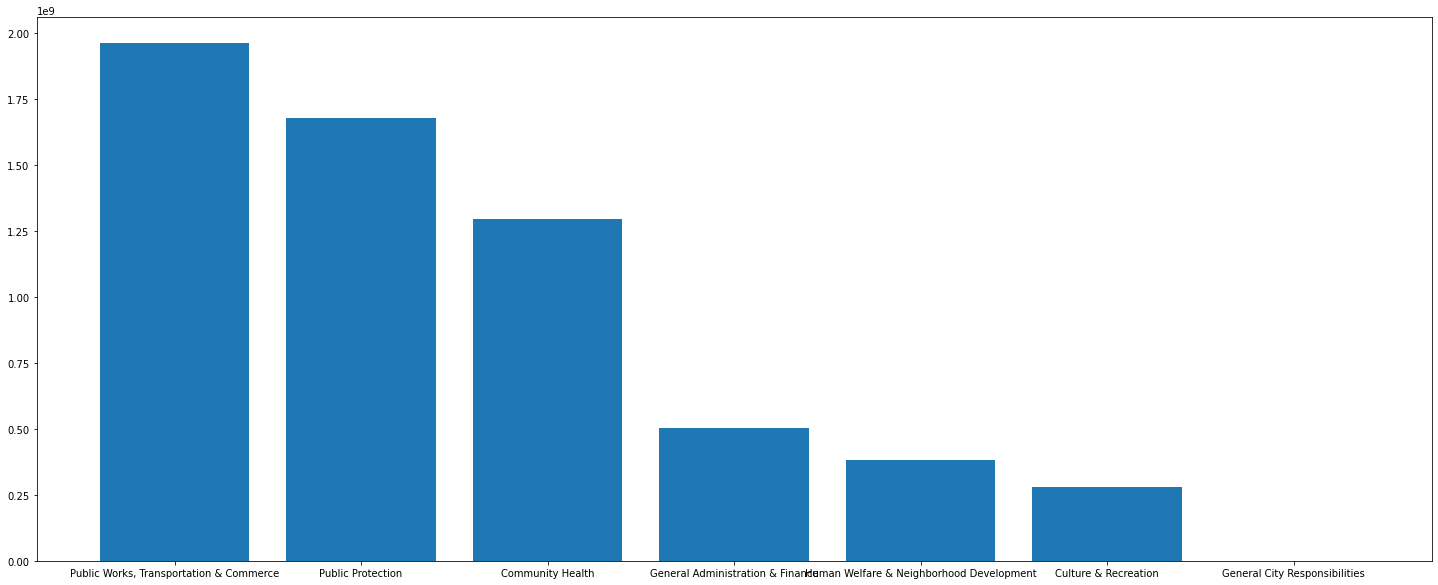

In [ ]:
from pyspark.sql.functions import desc
fig = plt.figure(figsize =(25, 10))

Final_DF_bar = EmpDF[['Organization Group','Total Compensation']].groupby('Organization Group').sum('Total Compensation').sort(desc("sum(Total Compensation)")).toPandas().head(10)
# display the top 10 organisation group 
plt.bar(Final_DF_bar["Organization Group"], Final_DF_bar["sum(Total Compensation)"])

#### 5.2. Find top Compensating Jobs. Display using bar plot

<BarContainer object of 15 artists>

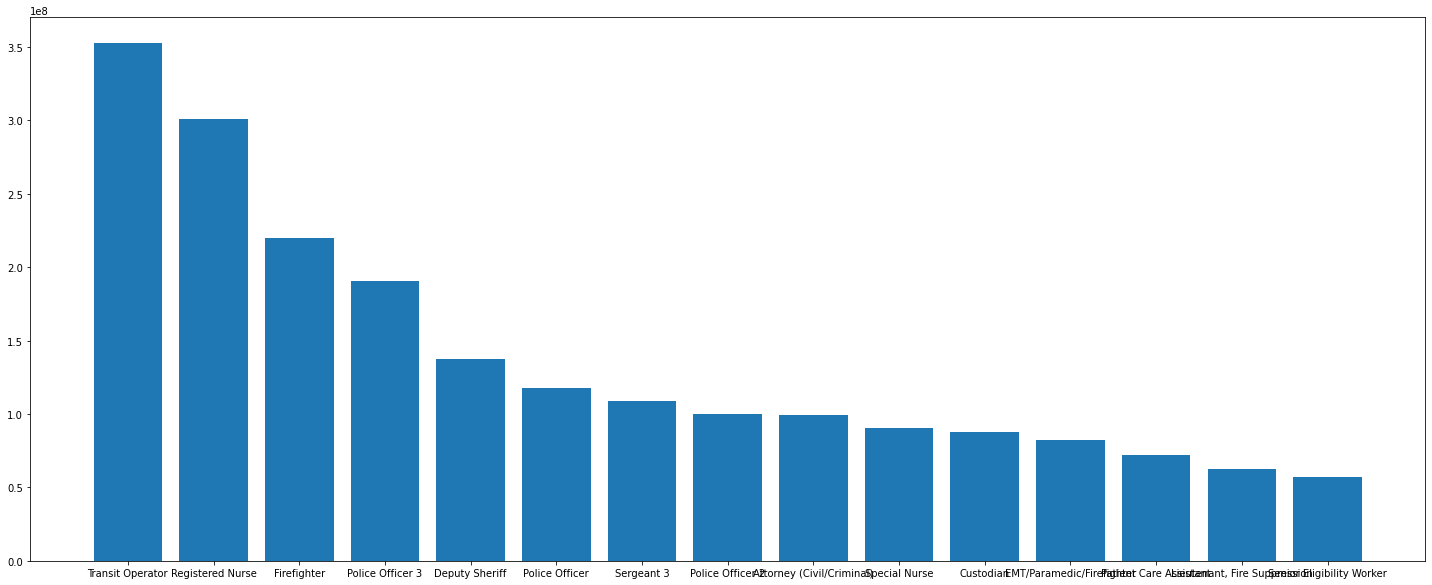

In [ ]:
from pyspark.sql.functions import desc
fig = plt.figure(figsize =(25, 10))

Final_DF_bar = EmpDF[['Job','Total Compensation']].groupby('Job').sum('Total Compensation').sort(desc("sum(Total Compensation)")).toPandas().head(15)
# display the top 10 organisation group 
plt.bar(Final_DF_bar["Job"], Final_DF_bar["sum(Total Compensation)"])

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

In [ ]:
data = EmpDF.toPandas()

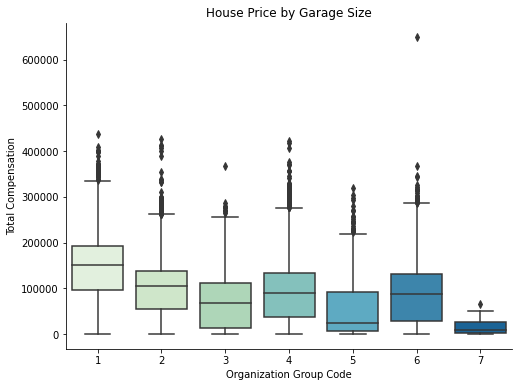

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Organization Group Code', y='Total Compensation', data=data, palette='GnBu')
title = plt.title('House Price by Garage Size')
sns.despine()

In [ ]:
IndependentVar = ['Year','Organization Group Code','Department Code','Union Code','Job Family Code','Job Code','Salaries','Overtime','Other Salaries','Total Salary','Retirement','Health/Dental','Other Benefits','Total Benefits']
TargetVar =['TotalCompensation']

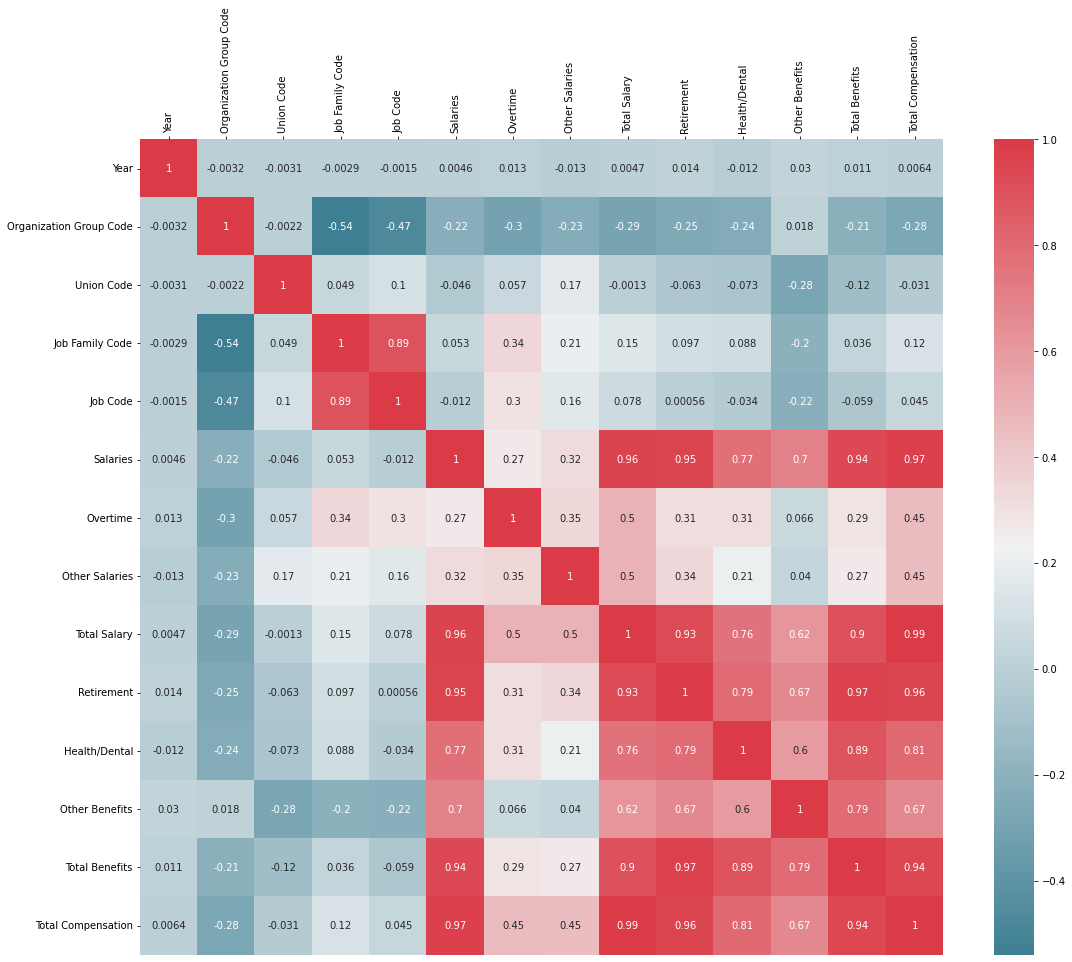

In [ ]:
continuous_df = data[IndependentVar+ ["Total Compensation"]]
correlation = continuous_df.corr()
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, 
           xticklabels=correlation.columns.values,
           yticklabels=correlation.index.values,
           cmap=cmap ,annot=True)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

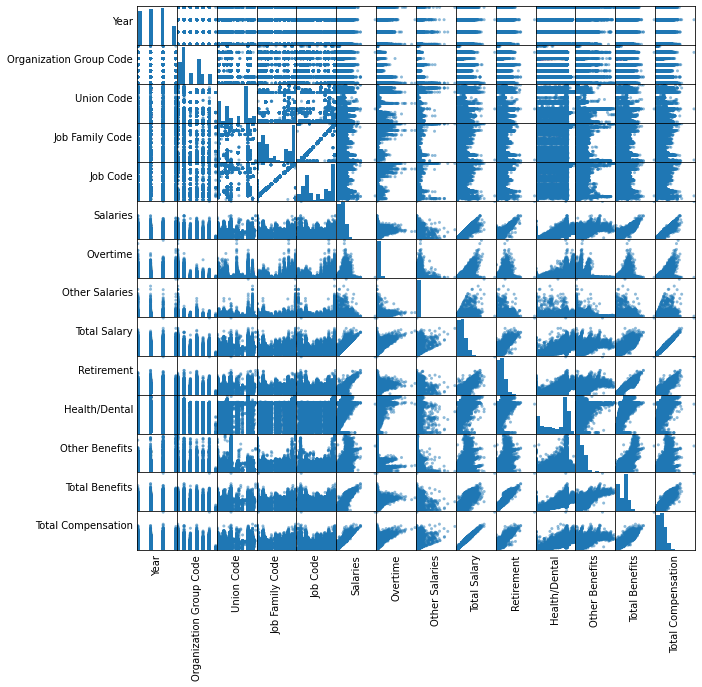

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in EmpDF.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = EmpDF.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [ ]:
import six
for i in EmpDF.columns:
    if not( isinstance(EmpDF.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Total Compensation for ", i, EmpDF.stat.corr('Total Compensation',i))

Correlation to Total Compensation for  Year 0.006366075238313312
Correlation to Total Compensation for  Organization Group Code -0.27537584379297486
Correlation to Total Compensation for  Union Code -0.031018237003742354
Correlation to Total Compensation for  Job Family Code 0.12380212983118864
Correlation to Total Compensation for  Job Code 0.04517155555015246
Correlation to Total Compensation for  Salaries 0.9725121384636931
Correlation to Total Compensation for  Overtime 0.4534272101402941
Correlation to Total Compensation for  Other Salaries 0.4505328566080988
Correlation to Total Compensation for  Total Salary 0.9943298109894975
Correlation to Total Compensation for  Retirement 0.9576196897138852
Correlation to Total Compensation for  Health/Dental 0.8055736633983627
Correlation to Total Compensation for  Other Benefits 0.6725538371556626
Correlation to Total Compensation for  Total Benefits 0.9439792789768565
Correlation to Total Compensation for  Total Compensation 1.0


In [ ]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Year','Organization Group Code','Union Code','Job Family Code','Job Code','Salaries','Overtime','Other Salaries','Total Salary','Retirement','Health/Dental','Other Benefits','Total Benefits'], outputCol = 'features')
vemp_df = vectorAssembler.transform(EmpDF)
vemp_df = vemp_df.select(['features', 'Total Compensation'])
vemp_df.show(3)

+--------------------+------------------+
|            features|Total Compensation|
+--------------------+------------------+
|[2016.0,1.0,311.0...|         159436.65|
|[2013.0,5.0,790.0...|         120054.05|
|[2015.0,4.0,535.0...|          13868.64|
+--------------------+------------------+
only showing top 3 rows



### 6.2 Split the data into train and test set

In [ ]:
splits = vemp_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

### 7. Fit Linear Regression model on the data and check its performance

In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Total Compensation', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-86.81790565362587,421.0611852620835,0.8853923049249106,-0.13441580498254366,0.1162755636322029,0.47381954073182186,0.6303488281761788,0.6619031569217306,0.36860699545286413,1.2175973068642305,0.2948511217352246,0.5503489822063695,0.5282385538141054]
Intercept: 174670.2313570079


In [ ]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 2268.976278
r2: 0.998876


In [ ]:
train_df.describe().show()

+-------+------------------+
|summary|Total Compensation|
+-------+------------------+
|  count|             43618|
|   mean| 97544.69378307133|
| stddev| 67668.01492564337|
|    min|               0.0|
|    max|         648875.24|
+-------+------------------+



In [ ]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","Total Compensation","features").show(50)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Total Compensation",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 905.3103383463167|               0.0|(13,[0,1,2,3,4],[...|
| 503.3051169665123|               0.0|(13,[0,1,2,3,4],[...|
| 506.0258398131118|               0.0|(13,[0,1,2,3,4],[...|
|1664.7005695980042|               0.0|(13,[0,1,2,3,4],[...|
|19798.376483357308|           17878.1|(13,[0,1,2,3,4,5,...|
|3880.6511523600493|               0.0|(13,[0,1,2,3,4,7]...|
|  136773.839375321|         131812.89|(13,[0,1,2,3,4,7,...|
| 2509.538029272546|             250.0|(13,[0,1,2,3,4,7,...|
| 2509.538029272546|    

In [ ]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 2237.34


In [ ]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.5, 0.3912443844944926, 0.10482256367831516, 0.03219440293769578, 0.013242440120271167, 0.005891989924493309, 0.0051712687550957105, 0.0013896745649134565, 0.0009121764286178629, 0.0007394584600225216, 0.0005664041683580231]
+-------------------+
|          residuals|
+-------------------+
| -852.5001108316646|
| -852.5001108316646|
| -905.3103383463167|
|-1786.9787352699204|
|  -2445.30958407445|
|-1245.7323444812791|
|-1644.5137529853673|
|-1517.7646146602638|
|-1411.6625608609465|
| -1756.744404493249|
| -678.8642995244008|
|-1009.8855237445096|
|-2857.3608965870226|
| -2022.138303132453|
|-2465.6470715555747|
|-1834.1866272246116|
| -942.0578281685187|
|-2538.8822111440486|
|-2588.0138502427226|
|-2723.8253757485586|
+-------------------+
only showing top 20 rows



In [ ]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","Total Compensation","features").show()

+------------------+------------------+--------------------+
|        prediction|Total Compensation|            features|
+------------------+------------------+--------------------+
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 852.5001108316646|               0.0|(13,[0,1,2,3,4],[...|
| 905.3103383463167|               0.0|(13,[0,1,2,3,4],[...|
| 503.3051169665123|               0.0|(13,[0,1,2,3,4],[...|
| 506.0258398131118|               0.0|(13,[0,1,2,3,4],[...|
|1664.7005695980042|               0.0|(13,[0,1,2,3,4],[...|
|19798.376483357308|           17878.1|(13,[0,1,2,3,4,5,...|
|3880.6511523600493|               0.0|(13,[0,1,2,3,4,7]...|
|  136773.839375321|         131812.89|(13,[0,1,2,3,4,7,...|
| 2509.538029272546|             250.0|(13,[0,1,2,3,4,7,...|
| 2509.538029272546|    

### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Total Compensation')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="Total Compensation", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 6903.56


In [ ]:
dt_model.featureImportances

SparseVector(13, {5: 0.0001, 8: 0.9929, 11: 0.0018, 12: 0.0052})

In [ ]:
EmpDF.take(1)

[Row(Year Type='Fiscal', Year=2016, Organization Group Code=1, Organization Group='Public Protection', Department Code='DAT', Union Code=311, Job Family Code=8100, Job Code=8177, Job='Attorney (Civil/Criminal)', Employee Identifier='49919', Salaries=114473.16, Overtime=0.0, Other Salaries=1500.0, Total Salary=115973.16, Retirement=21025.98, Health/Dental=13068.8, Other Benefits=9368.71, Total Benefits=43463.49, Total Compensation=159436.65)]

In [ ]:
%%shell
jupyter nbconvert --to html /content/Week_5_8_Assignment_Part2.ipynb

[NbConvertApp] Converting notebook /content/Week_5_8_Assignment_Part2.ipynb to html
[NbConvertApp] Writing 888005 bytes to /content/Week_5_8_Assignment_Part2.html
